In [68]:
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from scipy.stats import percentileofscore
from scipy import stats
import seaborn as sns
import pandas as pd
from linearmodels.iv import IV2SLS


For pi=2, 100.0% reject pi=0 at 5% level
5.2% reject beta=1 at 5% level, simulation median=0.9968, mean=0.9954

DescribeResult(nobs=1000, minmax=(13.863835068325312, 26.66352356982023), mean=20.099391963909845, variance=4.902865714135798, skewness=0.2946897030328006, kurtosis=0.02299315624522258)
For pi=1, 100.0% reject pi=0 at 5% level
4.5% reject beta=1 at 5% level, simulation median=1.0024, mean=0.9914

DescribeResult(nobs=1000, minmax=(5.843045785117004, 15.691001854191496), mean=10.040557759486765, variance=2.126747020946458, skewness=0.12266232094158208, kurtosis=0.06127719703700141)
For pi=0.25, 68.3% reject pi=0 at 5% level
1.8% reject beta=1 at 5% level, simulation median=0.975, mean=0.7878

DescribeResult(nobs=1000, minmax=(-1.5172294143463023, 6.17554338893987), mean=2.4683987191230554, variance=1.1075475664158232, skewness=0.02178689129103455, kurtosis=0.264733275240276)
For pi=0, 4.6% reject pi=0 at 5% level
0.3% reject beta=1 at 5% level, simulation median=1.8768, mean=1.

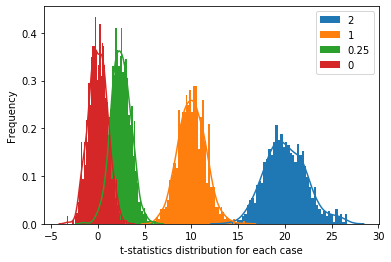

In [7]:
sim_N = 1000
    
N = 100
var_u = 1
var_v = 1
cov = 0.9
cov_matrix = [[var_u, cov],
             [cov, var_v]]
# DGP
beta = 1
pi_range = [2, 1, 0.25, 0]
pi_df = pd.DataFrame(columns=pi_range, index=['rejection frequency'])
for pi in pi_range:
# for pi in [2]:
    pi_result = []
    beta_result = []
    beta_t_result = []
    median = 0
    mean = 0
    for _i in range(sim_N):

        data = multivariate_normal([0,0], cov_matrix, size = N)
        u = data[:,0]
        v = data[:,1]
        z = np.random.randn(N)

        x = z*pi + v
        y = x*beta + u
        model = sm.OLS(x, z).fit()
        pi_sim = model.params[0]
        model_yx = sm.OLS(y-z*pi_sim, z*pi_sim).fit()
        pi_result.append(model.tvalues[0])
        beta_result.append(model_yx.params[0])
        beta_t_result.append(model_yx.tvalues[0])
    median = np.median(beta_result)
    mean = np.mean(beta_result)
    significant_pi = 100 - (percentileofscore(pi_result, 1.96) - percentileofscore(pi_result, -1.96))
    pi_df[pi] = significant_pi*sim_N/100
    pi_df.loc['min',pi] = stats.describe(pi_result)[1][0]
    pi_df.loc['max',pi]=stats.describe(pi_result)[1][1]
    pi_df.loc['mean',pi]=stats.describe(pi_result)[2]
    pi_df.loc['variance',pi]=stats.describe(pi_result)[3]
    pi_df.loc['skewness',pi]=stats.describe(pi_result)[4]
    pi_df.loc['kurtosis',pi]=stats.describe(pi_result)[5]+3
    
    std_hat = np.std(beta_result)
    mean_hat = np.mean(beta_result)
    upper_bound = mean_hat + 1.96*std_hat
    lower_bound = mean_hat - 1.96*std_hat
    significant_beta = 100 - (percentileofscore(beta_result, upper_bound) - percentileofscore(beta_result, lower_bound))
    print('For pi={}, {}% reject pi=0 at 5% level'.format(pi, round(significant_pi,2)))
    
#     pvalue = np.sum([1 for x in pvalue_result if x<0.05])
#     print('For pi={}, {}% reject significant_beta_t at 5% level'.format(pi, round(significant_beta_t,2)))
    print('{}% reject beta=1 at 5% level, simulation median={}, mean={}\n'.format(round(significant_beta,2), round(median+1,4), round(mean+1,4)))

    ax = sns.distplot(pi_result,
                  bins=50,
                  kde=True,
#                   color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
    plt.legend([2, 1, 0.25, 0])
    ax.set(xlabel='t-statistics distribution for each case', ylabel='Frequency')
    print(stats.describe(pi_result))
plt.savefig("t_distribution.png")  


In [5]:
pi_df

,2.0,1.0,0.25,0.0
rejection frequency,100.000000,100.000000,72.700000,4.900000
min,13.250193,5.979326,-0.205193,-2.981820
max,30.223885,15.846241,6.068295,3.670008
mean,20.021609,10.051580,2.584525,-0.015687
variance,5.447660,2.018975,1.072255,1.019395
skewness,0.323215,0.265639,0.138576,0.076197
kurtosis,3.436893,3.031329,2.985466,3.107509


For pi=2, 100.0% reject pi=0 at 5% level
0.07% reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=1000, minmax=(0.8169229099411467, 1.1519162183441094), mean=0.9990723327430951, variance=0.0025547198031776685, skewness=-0.23090571936977136, kurtosis=0.0621345178788153)
For pi=1, 100.0% reject pi=0 at 5% level
0.06% reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=1000, minmax=(0.510527282204548, 1.343609862119529), mean=0.9885322202340963, variance=0.010735299484206685, skewness=-0.5187518304574282, kurtosis=1.1961266152620649)
For pi=0.25, 67.5% reject pi=0 at 5% level
0.09% reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=1000, minmax=(-95.40421202271382, 21.130404786892665), mean=0.47886900918385855, variance=15.857757750861467, skewness=-16.991680922890033, kurtosis=371.43255075565963)
For pi=0, 3.5% reject pi=0 at 5% level
0.27% reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs

,2.0,1.0,0.25,0.0
rejection ratio,0.068000,0.061000,0.092000,0.269000
median,2.002283,1.993546,1.983488,2.899468
mean,1.999072,1.988532,1.478869,3.080178
min,1.816923,1.510527,-94.404212,-141.040289
max,2.151916,2.343610,22.130405,184.031641
variance,0.002555,0.010735,15.857758,112.106967
skewness,-0.230906,-0.518752,-16.991681,6.308695
kurtosis,3.062135,4.196127,374.432551,199.322559


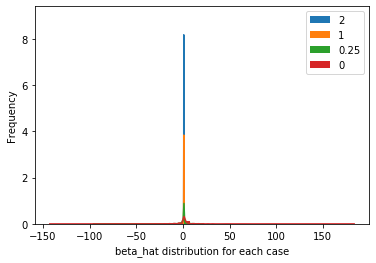

In [67]:

sim_N = 1000
    
N = 100
var_u = 1
var_v = 1
cov = 0.9
cov_matrix = [[var_u, cov],
             [cov, var_v]]
# DGP
beta = 1
pi_range = [2, 1, 0.25, 0]
beta_df = pd.DataFrame(columns=pi_range, index=['rejection ratio'])
for pi in pi_range:
# for pi in [2]:
    pi_result = []
    beta_result = []
    beta_t_result = []
    median = 0
    mean = 0
    for _i in range(sim_N):

        data = multivariate_normal([0,0], cov_matrix, size = N)
        u = data[:,0]
        v = data[:,1]
        z = np.random.randn(N)

        x = z*pi + v
        y = x*beta + u
        data=pd.DataFrame()
        data['x']=x
        data['y']=y
        data['z']=z
        model = sm.OLS(x, z).fit()
        pi_sim = model.params[0]
        mod = IV2SLS.from_formula('y ~ [ x ~ z]', data)
        beta_t = (mod.fit().params[0]-1)/mod.fit().std_errors[0]
        pi_result.append(model.tvalues[0])
        beta_result.append(mod.fit().params[0])
        beta_t_result.append(beta_t)
    significant_pi = 100 - (percentileofscore(pi_result, 1.96) - percentileofscore(pi_result, -1.96))
    significant_beta = np.sum([1 for x in beta_t_result if np.abs(x)>=1.96])/len(beta_t_result)
    beta_df[pi] = significant_beta
    beta_df.loc['median',pi]=np.median(beta_result)
    beta_df.loc['mean',pi]=np.mean(beta_result)
    beta_df.loc['min',pi] = stats.describe(beta_result)[1][0]
    beta_df.loc['max',pi]=stats.describe(beta_result)[1][1]
    beta_df.loc['variance',pi]=stats.describe(beta_result)[3]
    beta_df.loc['skewness',pi]=stats.describe(beta_result)[4]
    beta_df.loc['kurtosis',pi]=stats.describe(beta_result)[5]+3
    

    print('For pi={}, {}% reject pi=0 at 5% level'.format(pi, round(significant_pi,2)))
    
#     pvalue = np.sum([1 for x in pvalue_result if x<0.05])
#     print('For pi={}, {}% reject significant_beta_t at 5% level'.format(pi, round(significant_beta_t,2)))
    print('{} reject beta=1 at 5% level, simulation median={}, mean={}\n'.format(round(significant_beta,2), round(median+1,4), round(mean+1,4)))

    ax = sns.distplot(beta_result,
                  bins=50,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
    plt.legend([2, 1, 0.25, 0])
    ax.set(xlabel='beta_hat distribution for each case', ylabel='Frequency')
    print(stats.describe(beta_result))
plt.savefig("beta_distribution.png")  
beta_df

In [91]:
beta_df

,2.0,1.0,0.25,0.0
rejection ratio,4.900000,4.500000,4.532578,3.773585
significant pi ratio,100.000000,100.000000,70.600000,5.300000
median,0.998232,1.002938,1.130486,1.862559
mean,0.996435,0.994938,1.109086,1.868322
min,-0.165569,-0.405450,-0.668044,0.437048
max,0.148184,0.283428,0.669022,1.261766
variance,0.002611,0.010238,0.058268,0.038242
skewness,-0.260218,-0.541088,-0.383937,-0.151371
kurtosis,3.018111,3.554704,2.902162,2.388286


For pi=2, 100.0% reject pi=0 at 5% level
0.06 reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=1000, minmax=(0.7118740562842807, 1.1511130025383631), mean=0.996938218717402, variance=0.0026266569132662523, skewness=-0.39873740307546873, kurtosis=1.2812292431039918)
For pi=1, 100.0% reject pi=0 at 5% level
0.06 reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=1000, minmax=(0.5913350472674826, 1.3267549379442642), mean=0.9925991739249164, variance=0.010321151239658174, skewness=-0.36847059693888123, kurtosis=0.3461316295199315)
For pi=0.25, 71.2% reject pi=0 at 5% level
0.35 reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=273, minmax=(0.8143472741339303, 1.6371134420048696), mean=1.2873749453146985, variance=0.021942624892232775, skewness=-0.4990155115895283, kurtosis=0.28701768508696546)
For pi=0, 6.6% reject pi=0 at 5% level
1.0 reject beta=1 at 5% level, simulation median=1, mean=1

DescribeResult(nobs=4

,2.0,1.0,0.25,0.0
rejection ratio,0.056000,0.064000,0.347985,1.000000
median,0.998912,0.999614,1.307729,1.854112
mean,0.996938,0.992599,1.287375,1.864569
min,0.711874,0.591335,0.814347,1.666149
max,1.151113,1.326755,1.637113,2.083902
variance,0.002627,0.010321,0.021943,0.030580
skewness,-0.398737,-0.368471,-0.499016,0.187900
kurtosis,4.281229,3.346132,3.287018,1.841790


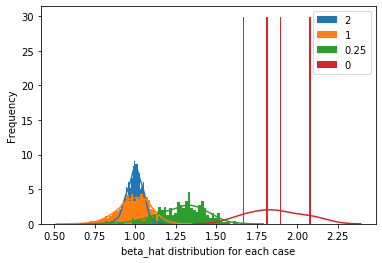

In [69]:
       

sim_N = 1000
    
N = 100
var_u = 1
var_v = 1
cov = 0.9
cov_matrix = [[var_u, cov],
             [cov, var_v]]
# DGP
beta = 1
pi_range = [2, 1, 0.25, 0]
beta_df = pd.DataFrame(columns=pi_range, index=['rejection ratio'])
for pi in pi_range:
# for pi in [2]:
    pi_result = []
    beta_result = []
    beta_t_result = []
    median = 0
    mean = 0
    for _i in range(sim_N):

        data = multivariate_normal([0,0], cov_matrix, size = N)
        u = data[:,0]
        v = data[:,1]
        z = np.random.randn(N)

        x = z*pi + v
        y = x*beta + u
        data=pd.DataFrame()
        data['x']=x
        data['y']=y
        data['z']=z
        model = sm.OLS(x, z).fit()
        pi_sim = model.params[0]
        mod = IV2SLS.from_formula('y ~ [ x ~ z]', data)
        beta_t = (mod.fit().params[0]-1)/mod.fit().std_errors[0]
        pi_result.append(model.tvalues[0])
        if np.abs(model.fvalue)>=10:
            beta_t_result.append(beta_t)
            beta_result.append(mod.fit().params[0])
        
    significant_pi = 100 - (percentileofscore(pi_result, 1.96) - percentileofscore(pi_result, -1.96))
    significant_beta = np.sum([1 for x in beta_t_result if np.abs(x)>=1.96])/len(beta_t_result)
    beta_df[pi] = significant_beta
    beta_df.loc['median',pi]=np.median(beta_result)
    beta_df.loc['mean',pi]=np.mean(beta_result)
    beta_df.loc['min',pi] = stats.describe(beta_result)[1][0]
    beta_df.loc['max',pi]=stats.describe(beta_result)[1][1]
    beta_df.loc['variance',pi]=stats.describe(beta_result)[3]
    beta_df.loc['skewness',pi]=stats.describe(beta_result)[4]
    beta_df.loc['kurtosis',pi]=stats.describe(beta_result)[5]+3
    

    print('For pi={}, {}% reject pi=0 at 5% level'.format(pi, round(significant_pi,2)))
    
#     pvalue = np.sum([1 for x in pvalue_result if x<0.05])
#     print('For pi={}, {}% reject significant_beta_t at 5% level'.format(pi, round(significant_beta_t,2)))
    print('{} reject beta=1 at 5% level, simulation median={}, mean={}\n'.format(round(significant_beta,2), round(median+1,4), round(mean+1,4)))

    ax = sns.distplot(beta_result,
                  bins=50,
                  kde=True,
                  hist_kws={"linewidth": 15,'alpha':1})
    plt.legend([2, 1, 0.25, 0])
    ax.set(xlabel='beta_hat distribution for each case', ylabel='Frequency')
    print(stats.describe(beta_result))
# plt.savefig("beta_distribution.png")  
beta_df

In [18]:
beta_df

,2.0,1.0,0.25,0.0
rejection ratio,4.900000,6.100000,93.750000,100.000000
significant pi ratio by f,100.000000,100.000000,25.600000,0.100000
significant pi ratio by t,100.000000,100.000000,68.800000,6.000000
median,0.999360,0.994647,1.262764,1.937409
mean,0.997763,0.985113,1.264689,1.937409
min,0.831610,0.478814,0.775340,1.937409
max,1.159850,1.291139,1.636364,1.937409
variance,0.002477,0.011696,0.022505,NaN
skewness,-0.152216,-0.715033,-0.239733,0.000000
kurtosis,2.930339,4.261014,3.042840,0.000000


#### pi significant case

In [10]:
sim_N = 1000
    
N = 100
var_u = 1
var_v = 1
cov = 0.9
cov_matrix = [[var_u, cov],
             [cov, var_v]]
# DGP
beta = 1
for pi in [2, 1, 0.25, 0]:
# for pi in [2]:
    beta_result = []
    median = 0
    mean = 0
    for _i in range(sim_N):

        data = multivariate_normal([0,0], cov_matrix, size = N)
        u = data[:,0]
        v = data[:,1]
        z = np.random.randn(N)

        x = z*pi + v
        y = x*beta + u
        model = sm.OLS(x, z).fit()
        pi_sim = model.params[0]
        model_yx = sm.OLS(y-z*pi_sim, z*pi_sim).fit()
        
        if np.abs(model.tvalues[0])>=1.96:
            beta_result.append(model_yx.params[0])
    median = np.median(beta_result)
    mean = np.mean(beta_result)
    std_hat = np.std(beta_result)
    mean_hat = np.mean(beta_result)
    upper_bound = mean_hat + 1.96*std_hat
    lower_bound = mean_hat - 1.96*std_hat
    significant_beta = 100 - (percentileofscore(beta_result, upper_bound) - percentileofscore(beta_result, lower_bound))
    print('{}% reject beta=1 at 5% level, simulation median={}, mean={}\n'.format(round(significant_beta,2), round(median+1,4), round(mean+1,4)))

5.3% reject beta=1 at 5% level, simulation median=0.9957, mean=0.9946

4.2% reject beta=1 at 5% level, simulation median=1.0013, mean=0.9903

4.93% reject beta=1 at 5% level, simulation median=1.1339, mean=1.1103

4.92% reject beta=1 at 5% level, simulation median=1.9036, mean=1.9031



In [82]:
beta_result

[0.7820579129052375,
 0.6905008577699859,
 1.0886910652831132,
 0.8590001884949977,
 1.2130556773465697,
 0.8133247866626148,
 1.0927205848540966,
 0.7867269186072685,
 1.0931877462724535,
 0.5530473393605619,
 0.8386881526265549,
 0.9517575888367926,
 0.8866458985071951,
 1.3991277254105043,
 0.6553882014222141,
 1.2383639983619457,
 1.1837410087611104,
 1.4047314874962349,
 0.677259011876943,
 0.8465952633182222,
 0.7209766900682912,
 0.7621332612023535,
 1.149404438788681,
 0.9368958138307162,
 0.7610046550456635,
 0.9226774033769074,
 0.8999031775279008,
 0.8902373937447788,
 0.7555318168931867,
 0.6039676087068873,
 0.8331986959518911,
 0.8479933716290604,
 0.8142854718057952,
 1.126662211929595,
 0.8543298932194944,
 0.9587687268428178,
 0.38723842029489547,
 1.0413800921965684,
 0.5594590570450979,
 0.6285336013544911,
 0.8279719846921783,
 0.8683580627016247,
 1.0279332047692178,
 0.6439774977581925,
 1.0556921038574092,
 0.7651682714029358,
 0.73569549910163,
 0.59529159160688

In [4]:
sim_N = 1000
    
N = 100
var_u = 1
var_v = 1
cov = 0.9
cov_matrix = [[var_u, cov],
             [cov, var_v]]
# DGP
beta = 1
for pi in [2, 1, 0.25, 0]:
# for pi in [2]:
    beta_result = []
    median = 0
    mean = 0
    for _i in range(sim_N):

        data = multivariate_normal([0,0], cov_matrix, size = N)
        u = data[:,0]
        v = data[:,1]
        z = np.random.randn(N)

        x = z*pi + v
        y = x*beta + u
        model = sm.OLS(x, z).fit()
        pi_sim = model.params[0]
        model_yx = sm.OLS(y-z*pi_sim, z*pi_sim).fit()
        
        if np.abs(model.fvalue)>=10:
            beta_result.append(model_yx.params[0])
    median = np.median(beta_result)
    mean = np.mean(beta_result)
    std_hat = np.std(beta_result)
    mean_hat = np.mean(beta_result)
    upper_bound = mean_hat + 1.96*std_hat
    lower_bound = mean_hat - 1.96*std_hat
    significant_beta = 100 - (percentileofscore(beta_result, upper_bound) - percentileofscore(beta_result, lower_bound))
    print('{}% reject beta=1 at 5% level, simulation median={}, mean={}\n'.format(round(significant_beta,2), round(median+1,4), round(mean+1,4)))

4.7% reject beta=1 at 5% level, simulation median=0.9973, mean=0.9965

5.5% reject beta=1 at 5% level, simulation median=0.9958, mean=0.9787

3.42% reject beta=1 at 5% level, simulation median=1.2886, mean=1.2764

100.0% reject beta=1 at 5% level, simulation median=1.8131, mean=1.8131



In [3]:
beta_result

[]

In [41]:

stats.describe(t_result)

DescribeResult(nobs=1000, minmax=(-3.1831014452120643, 2.937949527916756), mean=-0.0010487790687011547, variance=1.0517197426480347, skewness=-0.08741147941841754, kurtosis=-0.10907447824107441)

In [3]:
coef_result

NameError: name 'coef_result' is not defined

In [44]:

# Print out the statistics
model_yx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1428.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                    1.27e-60
Time:                        11:39:59   Log-Likelihood:                         -69.093
No. Observations:                 100   AIC:                                      140.2
Df Residuals:                      99   BIC:                                      142.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8481      0.049     37.788      0.000       1.751       1.945
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.357
Skew:                          -0.121   Prob(JB):                        0.836
Kurtosis:                       3.164   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""